# Fundamentals of Data Analytics  Homework 1
------------
## Part 1
### 1. Top-10 Reviewer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

In [2]:
pd_data = pd.read_csv("Reviews.csv")
pd_data = pd_data[:1000]

In [3]:
pd_data.head(3) #先偷看資料內容

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
data = pd_data.drop(["Id","HelpfulnessNumerator", "HelpfulnessDenominator", "Time"],axis=1) #去掉不要的column

group_data1 = data.groupby(["UserId", "ProfileName"], as_index=False).mean() #按照UserId, ProfileName分組後，取Score平均
sorted_data1 = group_data1.sort_values("UserId", ascending=False)            #按照UserId排好

group_data2 = data.groupby(["UserId", "ProfileName"], as_index=False).sum()   #按照UserId, ProfileName分組後，取Score總和
sorted_data2 = group_data2.sort_values("UserId", ascending=False)             #按照UserId排好

df = pd.DataFrame()                                                           #建立空的DataFrame
df.insert(0, column="UserId", value=sorted_data1["UserId"])                   #放入UserId
df.insert(1, column="ProfileName", value=sorted_data1["ProfileName"])         #放入ProfileName
df.insert(2, column="ScoreCount", value=sorted_data2["Score"])                #放入ScoreCount
df.insert(3, column="ScoreMean", value=sorted_data1["Score"])                 #放入ScoreMaen

sorted_df = df.sort_values("ScoreCount", ascending=False)                     #按照ScoreCount排好
print(sorted_df[:10])                                                         #印出ScoreMean前10的Id

             UserId                   ProfileName  ScoreCount  ScoreMean
662  A3PJZ8TU8FDQ1K                  Jared Castle          25   5.000000
681  A3RMGIKUWGPZOK                Jean Visnefski          18   4.500000
407  A2OEUROGZDTXUJ                     J. Graves          14   4.666667
645  A3NHUQ33CFH3VM                  Citizen John          13   3.250000
485  A31N6KB160O508                       Fran W.          12   4.000000
793   ADS5APY1NKTL4                D. Pawl "Dani"          10   5.000000
207  A1WX42M589VAMQ                           Mir          10   5.000000
802   AF72GTWZGAC61                       Pinkhat          10   5.000000
782   ACM3Z9NLSE8S9                         Tracy          10   5.000000
915   ATIHDHZYNQ0EI  Kristen O'donnell "twinsmom"          10   5.000000


### 2. Plot score distribution for the user with the most number of reviews

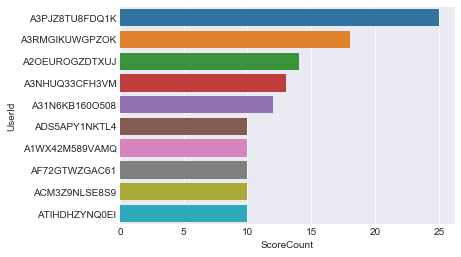

In [5]:
sns.set_style("darkgrid")
sns.barplot(sorted_df["ScoreCount"][:10], sorted_df["UserId"][:10])

### 3. Plot pandas Series DataFrame (Time->Date)

In [6]:
timelist = list(pd_data["Time"]) #取出Time就好

#將timestamp轉換成日期（年）並放入list
datelist = []
for i in timelist:
    timestamp = i
    timeArray = time.localtime(timestamp)
    date = time.strftime("%Y", timeArray)
    datelist.append(date)

countlist = [1] * len(datelist) #建立一個與datelist相同長度的count

# 建立DateFrame
dict_date = {"Date":datelist, "Count":countlist} 
df_date = pd.DataFrame(dict_date)

# 分組並計算出現次數
sorted_date = df_date.groupby(["Date"],as_index=False).sum()
sorted_date = sorted_date.sort_values("Count")

print(sorted_date)

   Date  Count
0  2005      2
1  2006      3
2  2007     65
3  2008    104
4  2009    112
5  2010    165
6  2011    229
7  2012    320


### 4. Plot HeatMap using seaborn

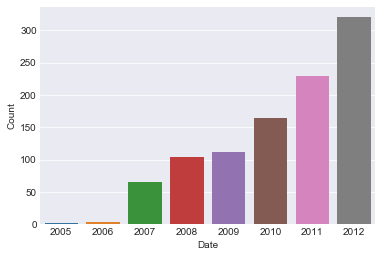

In [7]:
sns.barplot(sorted_date["Date"], sorted_date["Count"])

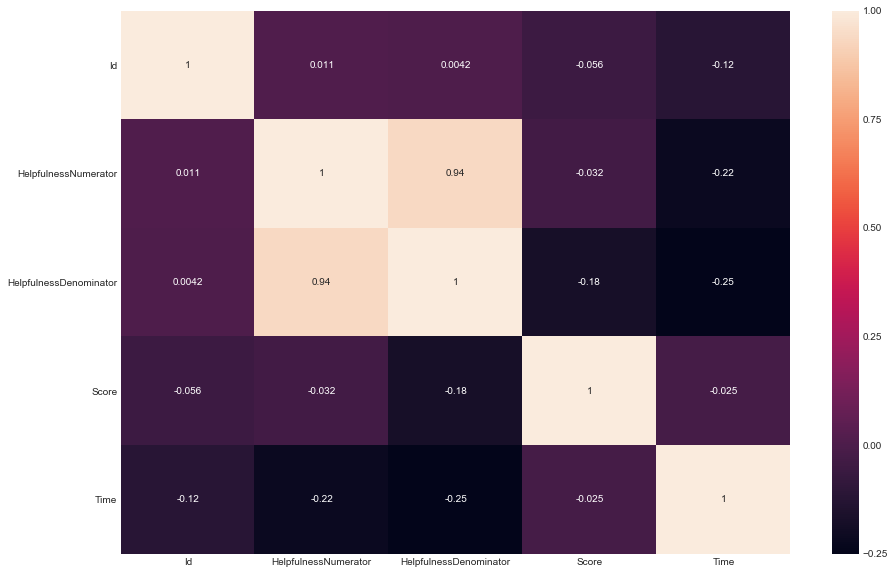

In [8]:
heatdata = pd_data.drop(["ProductId", "UserId", "ProfileName", "Summary", "Text"], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(heatdata.corr(), annot=True)

### 5. Helpful percent

(array([ 67.,   3.,  19.,  16.,   4.,  38.,  22.,  23.,  21., 317.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

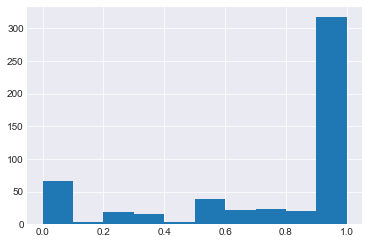

In [9]:
helpdata = pd_data.drop(["Id", "ProductId", "UserId", "ProfileName", "Summary", "Text", "Score", "Time"], axis=1)
helpdata["HelpfulPercent"] = helpdata["HelpfulnessNumerator"] / helpdata["HelpfulnessDenominator"]
helpdata = helpdata.dropna(axis=0)
helpdata
plt.hist(helpdata["HelpfulPercent"])

---
# Part 2

### 這個部分使用Kaggle上由美國運輸部（USDOT）所提供的2015年飛機航班延誤和取消的紀錄
這個資料集總共有31個變數、5,819,078筆資料。
- 資料網址：https://www.kaggle.com/usdot/flight-delays

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [11]:
flight_data = pd.read_csv("flights.csv")
flight_data = flight_data.drop(["YEAR","TAIL_NUMBER","CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY"
                                ,"AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","DIVERTED", "CANCELLED"], axis=1)
flight_sample = flight_data.sample(n=2500, random_state = 87)  # 資料量太大，只進行抽樣，並設定固定種子
print(flight_sample[:3])


/Users/tachungco/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
4911019     11    3            2      WN           4016            MDW   
3301637      7   25            6      EV           2674            VPS   
3469826      8    4            2      EV           5113            LGA   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
4911019                 DCA                 1215          1210.0   
3301637                 DFW                 1546          1859.0   
3469826                 GSO                 1510          1544.0   

         DEPARTURE_DELAY      ...        WHEELS_OFF  SCHEDULED_TIME  \
4911019             -5.0      ...            1224.0           100.0   
3301637            193.0      ...            1910.0           130.0   
3469826             34.0      ...            1601.0           114.0   

         ELAPSED_TIME  AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  \
4911019          98.0      79.0       601     1443.0      5.0   
3301637        

### 1. 找出哪間航空公司最容易延誤

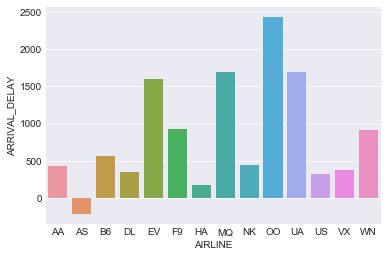

In [12]:
delay_air = flight_sample.groupby(["AIRLINE"], as_index=False).sum()

sns.set_style("darkgrid")
sns.barplot(delay_air["AIRLINE"], delay_air["ARRIVAL_DELAY"])

### 2. 每家航空公司延誤的組成

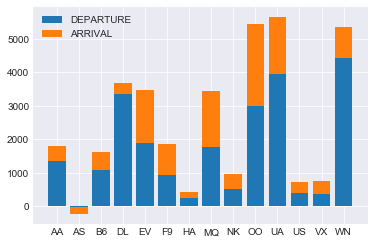

In [13]:
delay_reason = pd.DataFrame()
delay_reason.insert(0, column="AIRLINE", value=flight_sample["AIRLINE"])
delay_reason.insert(1, column="DEPARTURE_DELAY", value=flight_sample["DEPARTURE_DELAY"])
delay_reason.insert(2, column="ARRIVAL_DELAY", value=flight_sample["ARRIVAL_DELAY"])
delay_reason = delay_reason.groupby(["AIRLINE"], as_index=False).sum()

plt.bar(delay_reason["AIRLINE"], delay_reason["DEPARTURE_DELAY"], label="DEPARTURE")
plt.bar(delay_reason["AIRLINE"], delay_reason["ARRIVAL_DELAY"]
        , bottom=delay_reason["DEPARTURE_DELAY"], label="ARRIVAL")
plt.legend()

### 3. 一週不同天的延誤時數折線圖

   DAY_OF_WEEK  TOTAL_DELAY
0            1       5126.0
1            2       5605.0
2            3       5115.0
3            4       8554.0
4            5       6324.0
5            6       1543.0
6            7       2472.0


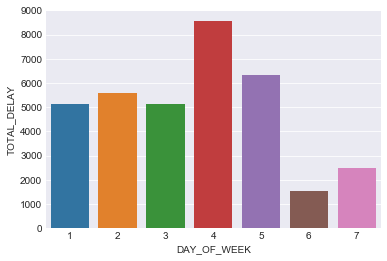

In [14]:
delay_day = pd.DataFrame()
delay_day.insert(0, column="DAY_OF_WEEK", value=flight_sample["DAY_OF_WEEK"])
delay_day.insert(1, column="TOTAL_DELAY", value=flight_sample["DEPARTURE_DELAY"]+flight_sample["ARRIVAL_DELAY"])

delay_day = delay_day.groupby(["DAY_OF_WEEK"], as_index=False).sum()
delay_day = delay_day.sort_values(["DAY_OF_WEEK"])
print(delay_day)
sns.barplot(delay_day["DAY_OF_WEEK"], delay_day["TOTAL_DELAY"])

### 4. 前50個最容易出發延誤的機場

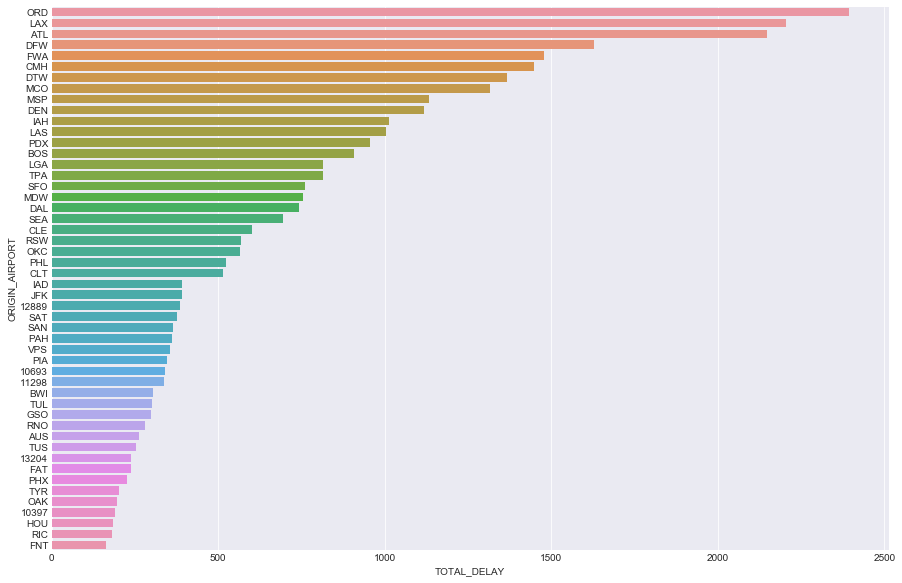

In [15]:
delay_ap = pd.DataFrame()
delay_ap.insert(0, column="ORIGIN_AIRPORT", value=flight_sample["ORIGIN_AIRPORT"])
# delay_ap["AIRPORT"].astype("str")
delay_ap.insert(1, column="TOTAL_DELAY", value=flight_sample["DEPARTURE_DELAY"]+flight_sample["ARRIVAL_DELAY"])
delay_ap = delay_ap.groupby(["ORIGIN_AIRPORT"], as_index=False).sum()
delay_ap = delay_ap.sort_values("TOTAL_DELAY", ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(delay_ap["TOTAL_DELAY"], delay_ap["ORIGIN_AIRPORT"][:50])